In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
# Read the data from csv file

df = pd.read_csv('bikes.csv')

In [4]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# checking the shape of dataframe

df.shape

(17379, 17)

In [6]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# renaming few columns for better readibility

#df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [9]:
# Check the head of the dataset

df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['rec_id','datetime','casual','registered'],axis=1,inplace=True)

In [11]:
# Encoding/mapping the season column

df.season = df.season.map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})

In [12]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
# Encoding/mapping the weathersit column

df.weather_condition = df.weather_condition.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [15]:
# check the head of the dataset

df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
0,winter,0,jan,0,0,sat,0,Clear,0.24,0.2879,0.81,0.0,16
1,winter,0,jan,1,0,sat,0,Clear,0.22,0.2727,0.80,0.0,40
2,winter,0,jan,2,0,sat,0,Clear,0.22,0.2727,0.80,0.0,32
3,winter,0,jan,3,0,sat,0,Clear,0.24,0.2879,0.75,0.0,13
4,winter,0,jan,4,0,sat,0,Clear,0.24,0.2879,0.75,0.0,1


In [16]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  object 
 1   year               17379 non-null  int64  
 2   month              17379 non-null  object 
 3   hour               17379 non-null  int64  
 4   is_holiday         17379 non-null  int64  
 5   weekday            17379 non-null  object 
 6   is_workingday      17379 non-null  int64  
 7   weather_condition  17379 non-null  object 
 8   temp               17379 non-null  float64
 9   atemp              17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  total_count        17379 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


# Data Preparation

In [17]:
months_df=pd.get_dummies(df.month,drop_first=False)
weekdays_df=pd.get_dummies(df.weekday,drop_first=False)
weathersit_df=pd.get_dummies(df.weather_condition,drop_first=False)
seasons_df=pd.get_dummies(df.season,drop_first=False)

In [18]:
#months_df

In [19]:
df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
0,winter,0,jan,0,0,sat,0,Clear,0.24,0.2879,0.81,0.0,16
1,winter,0,jan,1,0,sat,0,Clear,0.22,0.2727,0.80,0.0,40
2,winter,0,jan,2,0,sat,0,Clear,0.22,0.2727,0.80,0.0,32
3,winter,0,jan,3,0,sat,0,Clear,0.24,0.2879,0.75,0.0,13
4,winter,0,jan,4,0,sat,0,Clear,0.24,0.2879,0.75,0.0,1


In [20]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [21]:
df_new.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
0,winter,0,jan,0,0,sat,0,Clear,0.24,0.2879,...,False,False,True,False,False,False,False,False,False,True
1,winter,0,jan,1,0,sat,0,Clear,0.22,0.2727,...,False,False,True,False,False,False,False,False,False,True
2,winter,0,jan,2,0,sat,0,Clear,0.22,0.2727,...,False,False,True,False,False,False,False,False,False,True
3,winter,0,jan,3,0,sat,0,Clear,0.24,0.2879,...,False,False,True,False,False,False,False,False,False,True
4,winter,0,jan,4,0,sat,0,Clear,0.24,0.2879,...,False,False,True,False,False,False,False,False,False,True


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  object 
 1   year               17379 non-null  int64  
 2   month              17379 non-null  object 
 3   hour               17379 non-null  int64  
 4   is_holiday         17379 non-null  int64  
 5   weekday            17379 non-null  object 
 6   is_workingday      17379 non-null  int64  
 7   weather_condition  17379 non-null  object 
 8   temp               17379 non-null  float64
 9   atemp              17379 non-null  float64
 10  humidity           17379 non-null  float64
 11  windspeed          17379 non-null  float64
 12  total_count        17379 non-null  int64  
 13  apr                17379 non-null  bool   
 14  aug                17379 non-null  bool   
 15  dec                17379 non-null  bool   
 16  feb                173

In [23]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weather_condition'], axis = 1, inplace = True)

In [24]:
# check the head of new dataframe

df_new.head()

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,total_count,apr,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
0,0,0,0,0,0.24,0.2879,0.81,0.0,16,False,...,False,False,True,False,False,False,False,False,False,True
1,0,1,0,0,0.22,0.2727,0.80,0.0,40,False,...,False,False,True,False,False,False,False,False,False,True
2,0,2,0,0,0.22,0.2727,0.80,0.0,32,False,...,False,False,True,False,False,False,False,False,False,True
3,0,3,0,0,0.24,0.2879,0.75,0.0,13,False,...,False,False,True,False,False,False,False,False,False,True
4,0,4,0,0,0.24,0.2879,0.75,0.0,1,False,...,False,False,True,False,False,False,False,False,False,True


In [25]:
# check the shape of new dataframe

df_new.shape

(17379, 36)

In [26]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            17379 non-null  int64  
 1   hour            17379 non-null  int64  
 2   is_holiday      17379 non-null  int64  
 3   is_workingday   17379 non-null  int64  
 4   temp            17379 non-null  float64
 5   atemp           17379 non-null  float64
 6   humidity        17379 non-null  float64
 7   windspeed       17379 non-null  float64
 8   total_count     17379 non-null  int64  
 9   apr             17379 non-null  bool   
 10  aug             17379 non-null  bool   
 11  dec             17379 non-null  bool   
 12  feb             17379 non-null  bool   
 13  jan             17379 non-null  bool   
 14  july            17379 non-null  bool   
 15  june            17379 non-null  bool   
 16  mar             17379 non-null  bool   
 17  may             17379 non-null 

In [27]:
#Define X and y
X = df_new.drop('total_count', axis=1)
y = df_new['total_count']

## Splitting the Data into Training and Testing Sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13903, 35)
(3476, 35)
(13903,)
(3476,)


In [30]:
X_train.head(2)

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,apr,aug,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
335,0,11,0,0,0.20,0.197,0.55,0.2239,False,False,...,False,False,True,False,False,False,False,False,False,True
7035,0,18,0,1,0.52,0.500,0.42,0.1045,False,False,...,True,False,True,False,False,False,True,False,False,False


In [31]:
X_test.head(2)

,year,hour,is_holiday,is_workingday,temp,atemp,humidity,windspeed,apr,aug,...,tue,wed,Clear,Heavy_snowrain,Light_snowrain,Misty,fall,spring,summer,winter
12830,1,19,0,0,0.80,0.6970,0.27,0.1940,False,False,...,False,False,True,False,False,False,False,False,True,False
8688,1,20,1,0,0.24,0.2273,0.41,0.2239,False,False,...,False,False,True,False,False,False,False,False,False,True


## Scaling

In [32]:
scaler = MinMaxScaler()

## Scale only these features

num_vars = ['temp','atemp','humidity','windspeed']


In [33]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [34]:
lm = LinearRegression()

lm.fit(X_train, y_train)



LinearRegression()

In [35]:
y_pred = lm.predict(X_test)

dfn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfn.head()

,Actual,Predicted
12830,425,436.187500
8688,88,199.000000
7091,4,63.984375
12230,526,427.656250
431,13,-16.000000


Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

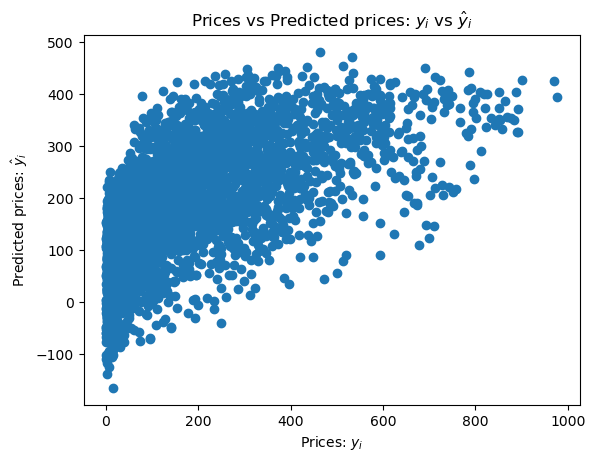

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [37]:
rmse = mean_squared_error(y_test, y_pred,squared=False)
print('MSE using linear regression is::',rmse)

rsq  = r2_score(y_test, y_pred)
print('R-Squared using linear regression is::',rsq)

MSE using linear regression is:: 136.84636222151957
R-Squared using linear regression is:: 0.40859991824256436
